### Daily stats:

In [108]:
import numpy as np
stats = np.array([17, 20, 20, 28, 34, 45, 59, 63, 93, 114, 147, 199])

### Fitting logits:

In [122]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(np.expand_dims(np.arange(len(stats)), axis=1), 
          np.array(np.log(stats)), 
          sample_weight=stats);

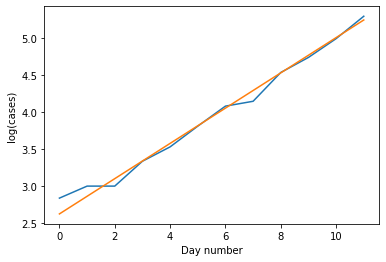

In [123]:
logit = model.coef_[0] * np.arange(len(stats)) + model.intercept_

plt.plot(np.log(stats), label='stats')
plt.plot(logit, label='trend');
plt.xlabel('Day number');
plt.ylabel('log(cases)');

### View prediction:

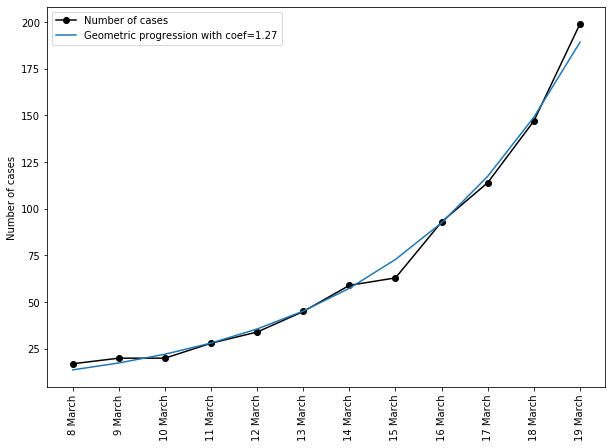

In [124]:
from datetime import date, timedelta

def plot_stats(model, stats, day0, prediction_days, population=None):
    plt.figure(figsize=(10,7))
    logit = model.coef_[0] * np.arange(prediction_days) + model.intercept_
    geom_regression_coeff = (np.e ** logit[1]) / (np.e ** logit[0])
    
    if population is None:
        population = 100
        plt.ylabel('Number of cases')
    else:
        plt.ylabel('% from population')
    plt.plot(stats  / population * 100, '-o', c='black', label='Number of cases');

    plt.plot(np.e ** logit / population * 100,
             label=f'Geometric progression with coef={geom_regression_coeff:.2f}');

    plt.xticks(ticks=range(prediction_days),
               labels=[f'{(day0 + timedelta(days=i)).day} {(day0 + timedelta(days=i)).strftime("%B")}'
                       for i in range(prediction_days)],
               rotation=90)
    plt.legend()
    plt.plot()
    

plot_stats(model, stats, date(2020, 3, 8), prediction_days=len(stats), population=None)

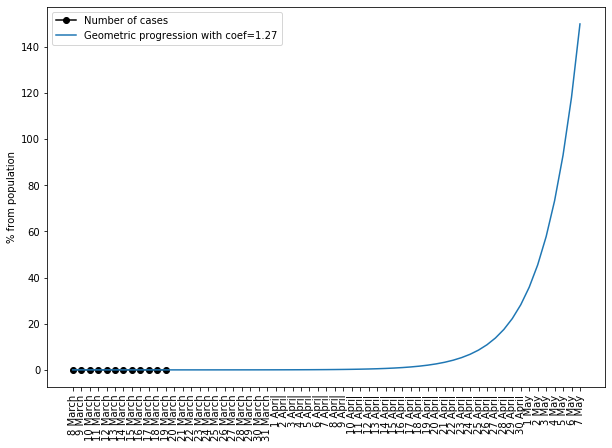

In [125]:
plot_stats(model, stats, date(2020, 3, 8), prediction_days=61, population=15*10**6)